In [22]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras import Sequential
from keras.regularizers import l1, l2, l1_l2

In [23]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [24]:
x_train=x_train/255
x_test=x_test/255

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [26]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation="relu",kernel_regularizer=l1_l2(0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(10,activation="softmax"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                        

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=6,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [38]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(x_train,y_train,epochs=20,verbose=1,validation_split=0.2,callbacks=callback)


Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.1049 - val_accuracy: 0.9762
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.1072 - val_accuracy: 0.9773
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.1070 - val_accuracy: 0.9770
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0221 - accuracy: 0.9925 - val_loss: 0.1190 - val_accuracy: 0.9743
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.1045 - val_accuracy: 0.9784
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0181 - accuracy: 0.9936 - val_loss: 0.1105 - val_accuracy: 0.9768
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.1111 - val_accuracy:

In [43]:
#model without sequential model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Define the input layer
input_layer = layers.Input(shape=(28,28))
flatten_layer = layers.Flatten()(input_layer)

# Define the hidden layers
hidden1 = layers.Dense(128, activation='relu')(flatten_layer)
hidden2 = layers.Dense(64, activation='relu')(hidden1)

bach=layers.BatchNormalization()(hidden2)
drop=layers.Dropout(0.4)(bach)

# Define the output layer
output_layer = layers.Dense(10, activation='softmax')(drop)

# Create the model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               100480    
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_6 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                           

In [47]:

import numpy as np
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=10)


In [48]:
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [45]:
history = model.fit(x_train,y_train_encoded,epochs=20,verbose=1,validation_split=0.2,callbacks=callback)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3609 - accuracy: 0.8923 - val_loss: 0.1479 - val_accuracy: 0.9560
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1662 - accuracy: 0.9513 - val_loss: 0.1136 - val_accuracy: 0.9663
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1214 - accuracy: 0.9648 - val_loss: 0.1044 - val_accuracy: 0.9693
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0978 - accuracy: 0.9715 - val_loss: 0.1000 - val_accuracy: 0.9707
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0840 - accuracy: 0.9750 - val_loss: 0.0997 - val_accuracy: 0.9718
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0722 - accuracy: 0.9788 - val_loss: 0.0881 - val_accuracy: 0.9741
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0592 - accuracy: 0.9818 - val_loss: 0.0910 - val_accuracy:

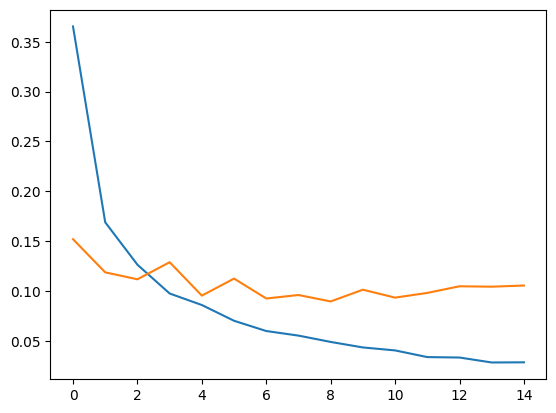

In [36]:
import matplotlib.pylab as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
x=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
x

array([[5.1219629e-11, 1.4397562e-11, 2.9813777e-06, ..., 9.9998701e-01,
        3.2800779e-10, 7.1836951e-07],
       [1.2945131e-08, 2.9611408e-03, 9.9701381e-01, ..., 9.7488402e-13,
        9.3648578e-06, 6.7634808e-14],
       [1.2448766e-07, 9.9935931e-01, 1.1680178e-05, ..., 5.4060796e-04,
        2.1929887e-05, 8.3428978e-07],
       ...,
       [1.6533447e-10, 1.2319456e-08, 6.3547461e-09, ..., 9.7016728e-04,
        8.7622866e-05, 8.0025941e-03],
       [3.6825440e-06, 9.3245256e-07, 6.0296568e-09, ..., 1.4597423e-07,
        5.6336535e-04, 2.7033633e-07],
       [3.7558138e-07, 2.7703881e-11, 1.1370515e-04, ..., 3.3701267e-11,
        8.5930580e-08, 2.3959552e-09]], dtype=float32)

In [ ]:
xt=x.argmax(axis=1)
xt

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

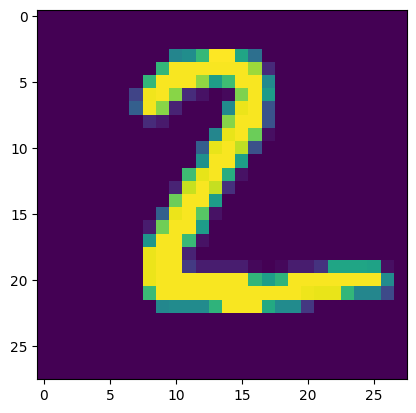

In [ ]:
plt.imshow(x_test[1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,xt)

0.977

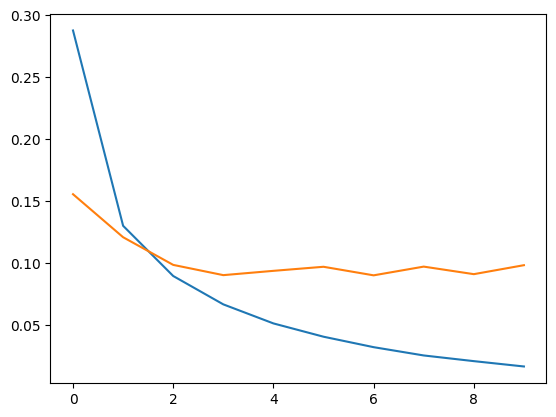

In [ ]:
#At first time
import matplotlib.pylab as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

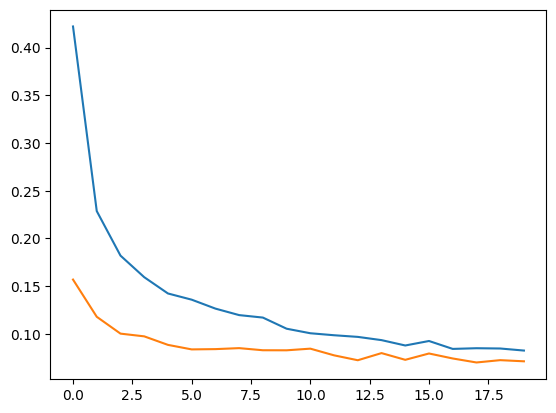

In [ ]:
#After dropout layer And increase hidden layer
import matplotlib.pylab as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

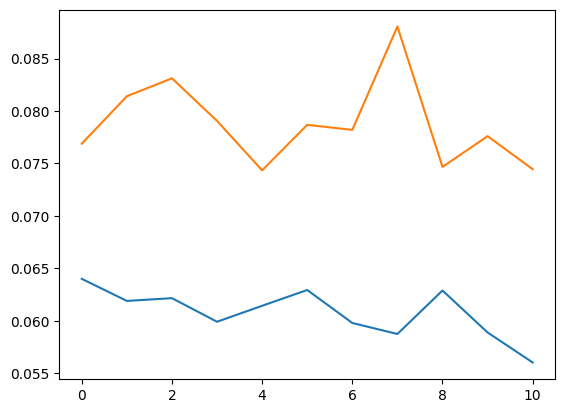

In [ ]:
#after early stoping
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])


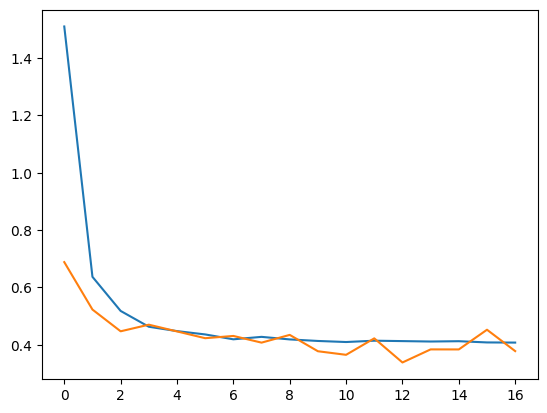

In [ ]:
#after early stoping\
import matplotlib.pylab as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

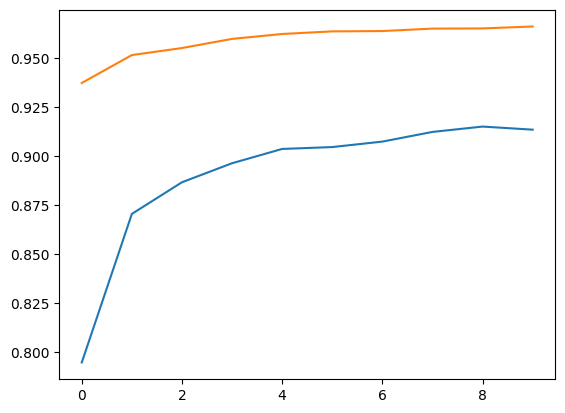

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

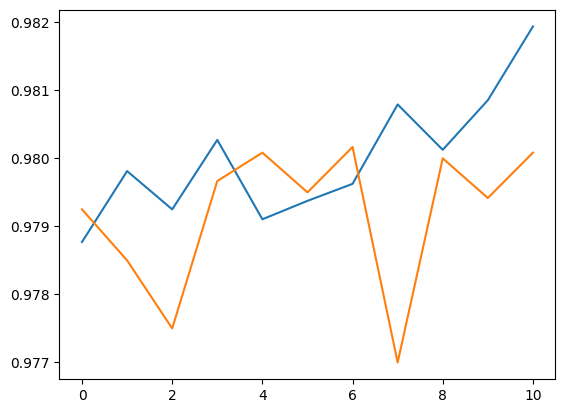

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])